<a href="https://colab.research.google.com/github/MauricioCastroF/VC1_EntregaTP/blob/main/TP3_VC1_CASTRO_FRANCO_MAURICIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I.git
!cd vision_computadora_I && git checkout 8va-cohorte

Cloning into 'vision_computadora_I'...
remote: Enumerating objects: 528, done.
remote: Counting objects: 100% (528/528), done.
remote: Compressing objects: 100% (321/321), done.
remote: Total 528 (delta 195), reused 502 (delta 183), pack-reused 0
Receiving objects: 100% (528/528), 149.78 MiB | 22.17 MiB/s, done.
Resolving deltas: 100% (195/195), done.
Branch '8va-cohorte' set up to track remote branch '8va-cohorte' from 'origin'.
Switched to a new branch '8va-cohorte'


In [ ]:
cd vision_computadora_I/Material_TPs/TP3

/content/vision_computadora_I/Material_TPs/TP3


Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs / images a partir del template Material_TPs / template

In [ ]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import argparse
from PIL import Image

In [ ]:
img = Image.open("/content/vision_computadora_I/Material_TPs/TP3/images/coca_logo_1.png")
template = Image.open("/content/sample_data/Coca-Cola_logo_white.png")

new_size = (140, 60)
template = template.resize(new_size)

save_path = '/content/sample_data/template.png'  # ruta donde guardarás la imagen redimensionada
template.save(save_path)

In [ ]:
img = cv.imread("/content/vision_computadora_I/Material_TPs/TP3/images/coca_logo_1.png")
template = cv.imread("/content/sample_data/template.png")

imageGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
templateGray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

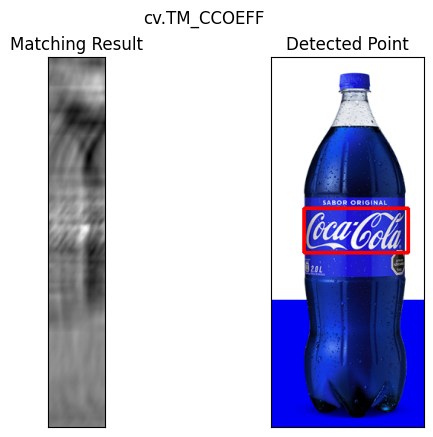

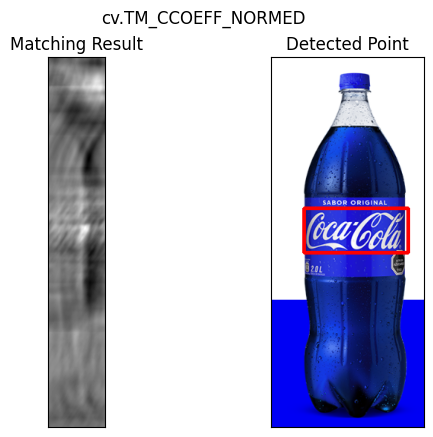

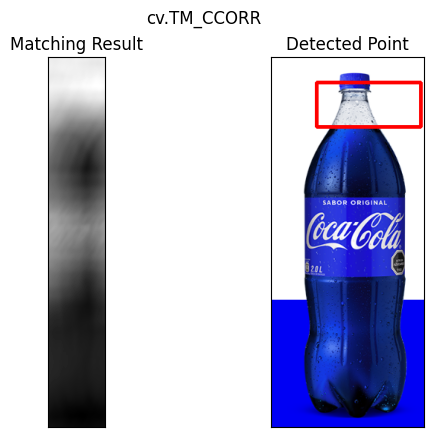

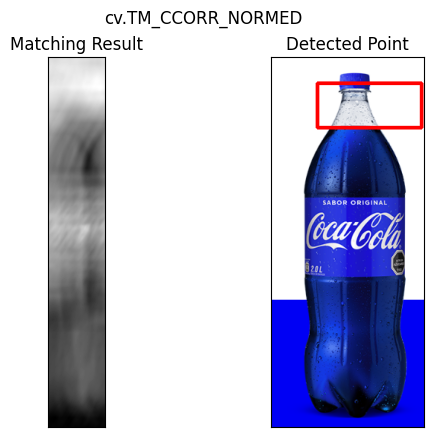

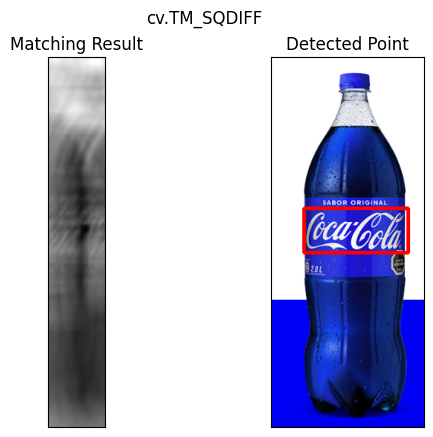

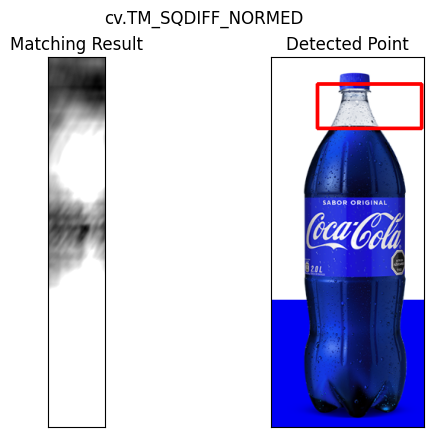

In [ ]:
w, h = templateGray.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    img_salida = img.copy()
    
    method = eval(meth)
    
    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img, template, method)
    
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, 255, 3)
    
    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()
    
    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

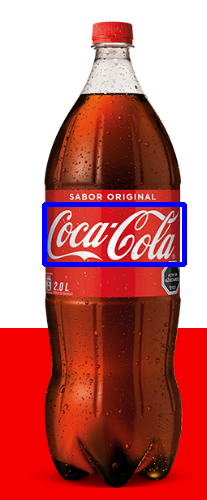

In [ ]:
result = cv.matchTemplate(imageGray, templateGray,cv.TM_CCOEFF_NORMED)
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)
(startX, startY) = maxLoc
endX = startX + template.shape[1]
endY = startY + template.shape[0]
cv.rectangle(img, (startX, startY), (endX, endY), (255, 0, 0), 3)
# show the output image
cv2_imshow(img)